In [75]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph. I like it most for plot
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn import metrics # for the check the error and accuracy of the model
import datetime as date

In [63]:
df = pd.read_csv('na_storms_summary.csv')

In [64]:
df.head()

,Unnamed: 0,NUMBER,NAME,SEASON_Year,ISO_TIME,NATURE,LAT,LON,WMO_WIND_KTS,WMO_PRES,STORM_SPEED_KTS,STORM_DIR_degrees,geohash,geohash2,Strike_Target
0,0,20,ALBERTO,2012,5/19/2012 0:00,DS,33.1,-77.0,25,1010,3,196,dmchr,dm,1
1,1,2,ALEX,2016,1/10/2016 0:00,ET,34.4,-54.2,65,981,16,119,dy17w,dy,0
2,2,47,ALICIA,1983,8/15/1983 12:00,TS,27.3,-90.5,30,1009,5,258,9uzek,9u,0
3,3,57,ALLEN,1980,7/31/1980 12:00,NR,11.0,-30.0,25,,22,267,e3fwt,e3,0
4,4,27,ALLISON,1995,6/10/1995 0:00,ET,57.0,-52.0,40,997,36,360,ff5h2,ff,1


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         175 non-null    int64  
 1   NUMBER             175 non-null    int64  
 2   NAME               175 non-null    object 
 3   SEASON_Year        175 non-null    int64  
 4   ISO_TIME           175 non-null    object 
 5   NATURE             175 non-null    object 
 6   LAT                175 non-null    float64
 7   LON                175 non-null    float64
 8   WMO_WIND_KTS       175 non-null    object 
 9   WMO_PRES           175 non-null    object 
 10  STORM_SPEED_KTS    175 non-null    int64  
 11  STORM_DIR_degrees  175 non-null    int64  
 12  geohash            175 non-null    object 
 13  geohash2           175 non-null    object 
 14  Strike_Target      175 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 20.6+ KB


In [90]:
#convert date field 
df['ISO_TIME'] = pd.to_datetime(df['ISO_TIME'])

df['dt'] = pd.to_datetime(df['ISO_TIME'])

#df['WMO_WIND_KTS'] = df['WMO_WIND_KTS'].astype(float)

#df['WMO_PRES'] = df['WMO_PRES'].astype(float)


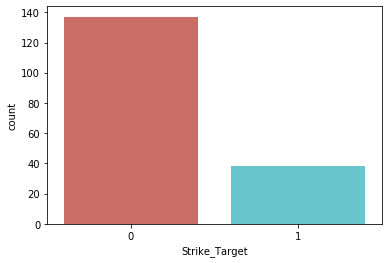

<Figure size 432x288 with 0 Axes>

In [105]:
#Check the occurence of Strike vs non-strike 
sns.countplot(x='Strike_Target', data=df, palette='hls')
plt.show()
plt.savefig('count_plot')

In [91]:
df.corr() # .corr is used for find corelation

,Unnamed: 0,NUMBER,SEASON_Year,LAT,LON,STORM_SPEED_KTS,STORM_DIR_degrees,Strike_Target
Unnamed: 0,1.000000,0.547221,0.121084,-0.109308,0.211694,-0.074950,0.045278,-0.266121
NUMBER,0.547221,1.000000,-0.364481,-0.084223,0.118729,-0.094359,0.105633,-0.101390
SEASON_Year,0.121084,-0.364481,1.000000,-0.050428,0.013614,-0.030074,-0.128027,-0.135087
LAT,-0.109308,-0.084223,-0.050428,1.000000,-0.026097,0.146116,-0.448486,0.201346
LON,0.211694,0.118729,0.013614,-0.026097,1.000000,0.232623,0.179654,-0.130874
STORM_SPEED_KTS,-0.074950,-0.094359,-0.030074,0.146116,0.232623,1.000000,0.058908,-0.035381
STORM_DIR_degrees,0.045278,0.105633,-0.128027,-0.448486,0.179654,0.058908,1.000000,-0.034286
Strike_Target,-0.266121,-0.101390,-0.135087,0.201346,-0.130874,-0.035381,-0.034286,1.000000


In [92]:
df['ISO_TIME']=df['ISO_TIME'].map(date.datetime.toordinal)

In [93]:
##x= df[['SEASON_Year', 'ISO_TIME','NATURE', 'LAT','LON','WMO_WIND_KTS', 'WMO_PRES', 'STORM_SPEED_KTS','STORM_DIR_degrees', 'geohash', 'geohash2'  ]]

x= df[['SEASON_Year',  'LAT','LON',
           'STORM_SPEED_KTS','ISO_TIME','STORM_DIR_degrees'  ]]
y= df['Strike_Target']

In [94]:
df.isnull().sum()
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SEASON_Year        175 non-null    int64  
 1   LAT                175 non-null    float64
 2   LON                175 non-null    float64
 3   STORM_SPEED_KTS    175 non-null    int64  
 4   ISO_TIME           175 non-null    int64  
 5   STORM_DIR_degrees  175 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 8.3 KB


In [95]:
#Split data into train and test dataset
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [96]:
#Create a scalar - to ensure that values are compared on same scale
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# fit and transform data
X_train =sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [97]:
# create and configure model
LogReg = LogisticRegression(solver='lbfgs')
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression()

In [98]:
logistic = LogisticRegression()
logistic.fit(X_train,y_train)
temp=logistic.predict(X_test)
print(metrics.accuracy_score(temp,y_test)) 

0.7045454545454546


We have an accuracy score of 70percent

In [100]:
y_pred = LogReg.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [101]:
print(metrics.accuracy_score(y_test, y_pred)*100)     # prints the accuracy


70.45454545454545


In [102]:
# Using COnfusion matrix to view predictions and test data
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[31,  1],
       [12,  0]])

In [103]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.97      0.83        32
           1       0.00      0.00      0.00        12

    accuracy                           0.70        44
   macro avg       0.36      0.48      0.41        44
weighted avg       0.52      0.70      0.60        44



In [106]:
Full_predict = LogReg.predict(x)

In [107]:
full_predict_prob = LogReg.predict_proba(X_test)

In [108]:
print (full_predict_prob)

[[0.85058974 0.14941026]
 [0.87693946 0.12306054]
 [0.68174969 0.31825031]
 [0.94490518 0.05509482]
 [0.68734488 0.31265512]
 [0.74102634 0.25897366]
 [0.72336825 0.27663175]
 [0.76267619 0.23732381]
 [0.70679743 0.29320257]
 [0.9162886  0.0837114 ]
 [0.8537521  0.1462479 ]
 [0.68508852 0.31491148]
 [0.53213797 0.46786203]
 [0.77051107 0.22948893]
 [0.7914988  0.2085012 ]
 [0.74886597 0.25113403]
 [0.69550242 0.30449758]
 [0.70448709 0.29551291]
 [0.63747669 0.36252331]
 [0.80351379 0.19648621]
 [0.45416308 0.54583692]
 [0.92512156 0.07487844]
 [0.50977179 0.49022821]
 [0.86876838 0.13123162]
 [0.89319791 0.10680209]
 [0.86804191 0.13195809]
 [0.90337819 0.09662181]
 [0.70276399 0.29723601]
 [0.71899018 0.28100982]
 [0.89780654 0.10219346]
 [0.86325871 0.13674129]
 [0.88601656 0.11398344]
 [0.83996123 0.16003877]
 [0.78225484 0.21774516]
 [0.64833084 0.35166916]
 [0.78673743 0.21326257]
 [0.68609717 0.31390283]
 [0.794301   0.205699  ]
 [0.91917834 0.08082166]
 [0.74763502 0.25236498]


In [109]:
full_pred_prob = LogReg.predict_proba(X_test)[:, 1]

In [110]:
thresh = 0.6

In [111]:
thresh_6 = full_pred_prob >= thresh

In [112]:
pd.DataFrame(thresh_6)

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False
